In [4]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

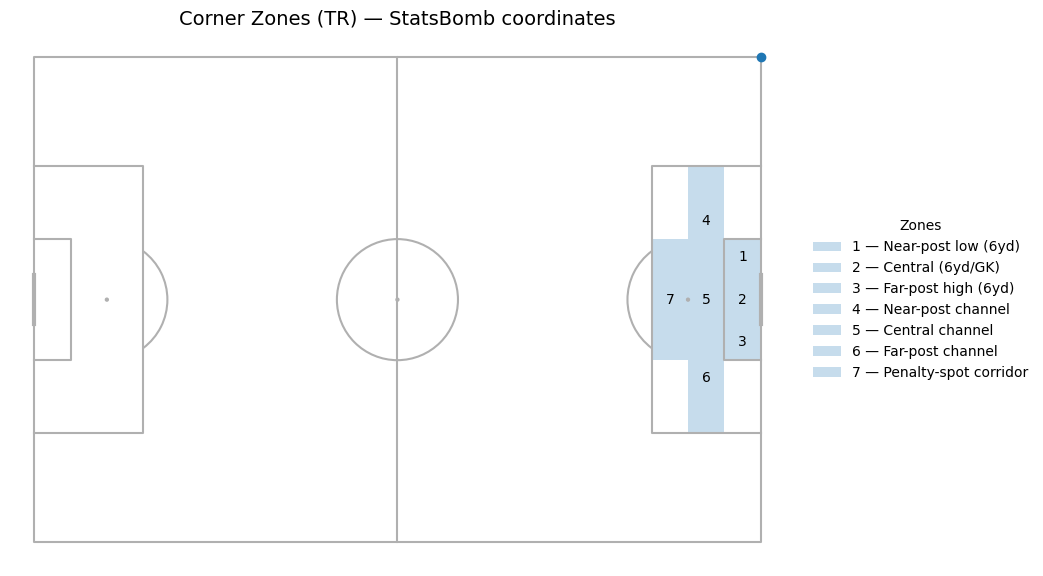

In [5]:
PITCH_X, PITCH_Y = 120, 80

def _flip_rect(rect, flip_x=False, flip_y=False):
    xmin, xmax, ymin, ymax, name = rect
    if flip_x:
        xmin, xmax = PITCH_X - xmax, PITCH_X - xmin
    if flip_y:
        ymin, ymax = PITCH_Y - ymax, PITCH_Y - ymin
    xmin, xmax = min(xmin, xmax), max(xmin, xmax)
    ymin, ymax = min(ymin, ymax), max(ymin, ymax)
    return (xmin, xmax, ymin, ymax, name)

def corner_zones(corner="TR"):
    # Base definition for TR; tweak as you like
    base = [
        (114, 120, 30, 36, "Near-post low (6yd)"),
        (114, 120, 36, 44, "Central (6yd/GK)"),
        (114, 120, 44, 50, "Far-post high (6yd)"),
        (108, 114, 18, 36, "Near-post channel"),
        (108, 114, 36, 44, "Central channel"),
        (108, 114, 44, 62, "Far-post channel"),
        (102, 108, 30, 50, "Penalty-spot corridor"),
    ]
    flip_x = corner in {"TL", "BL"}
    flip_y = corner in {"BR", "BL"}
    return [_flip_rect(r, flip_x=flip_x, flip_y=flip_y) for r in base]

def draw_corner_pitch_with_legend(corner="TR", alpha=0.25):
    pitch = Pitch(pitch_type="statsbomb", line_zorder=2, linewidth=1.5, pitch_color="white")
    fig, ax = pitch.draw(figsize=(10, 6))
    zones = corner_zones(corner)

    # Number zones 1..N and draw rectangles
    legend_handles = []
    for i, (xmin, xmax, ymin, ymax, name) in enumerate(zones, start=1):
        width, height = (xmax - xmin), (ymax - ymin)
        rect = Rectangle((xmin, ymin), width, height, alpha=alpha, zorder=1)
        ax.add_patch(rect)

        # Put only the number on the pitch
        ax.text(
            xmin + width/2.0,
            ymin + height/2.0,
            str(i),
            ha="center", va="center", fontsize=10, zorder=3
        )

        # Build a legend entry "i — full name"
        legend_handles.append(Rectangle((0, 0), 1, 1, alpha=alpha, label=f"{i} — {name}"))

    # Corner marker
    corner_marks = {"TR": (PITCH_X, 0), "BR": (PITCH_X, PITCH_Y), "TL": (0, 0), "BL": (0, PITCH_Y)}
    cx, cy = corner_marks[corner]
    ax.plot([cx], [cy], marker="o", markersize=6)

    # Put legend OUTSIDE (right side). Adjust bbox_to_anchor x as needed.
    lg = ax.legend(
        handles=legend_handles,
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
        title="Zones",
    )

    ax.set_title(f"Corner Zones ({corner}) — StatsBomb coordinates", fontsize=14)
    fig.tight_layout()
    return fig, ax

# Example:
fig, ax = draw_corner_pitch_with_legend(corner="TR")
plt.show()


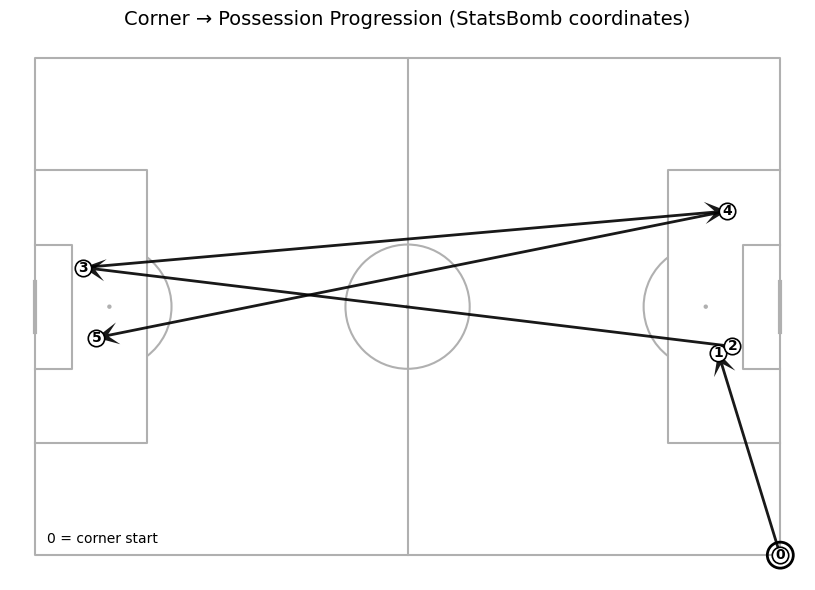

In [7]:
# === your sequence (StatsBomb coordinates: 120 x 80) ===
# 0 = corner start, then the rest of the possession in order
coords = np.array([
    [120.0, 80.0],
    [110.0, 47.4],
    [112.3, 46.4],
    [7.8, 33.7],
    [111.4, 24.6],
    [9.9, 45.0],
])

# --- build pitch ---
pitch = Pitch(
    pitch_type='statsbomb',  # uses 120x80 and correct orientation
    line_zorder=1,
    linewidth=1.5
)
fig, ax = pitch.draw(figsize=(9, 6))

# --- scatter the points ---
# first point (corner) highlighted differently
pitch.scatter(coords[0, 0], coords[0, 1], s=350, ax=ax,
              facecolor='none', edgecolor='black', linewidth=2.0, zorder=3)
pitch.scatter(coords[0, 0], coords[0, 1], s=140, ax=ax,
              facecolor='white', edgecolor='black', linewidth=1.2, zorder=4)

# rest of the possession
if len(coords) > 1:
    pitch.scatter(coords[1:, 0], coords[1:, 1], s=140, ax=ax,
                  facecolor='white', edgecolor='black', linewidth=1.2, zorder=3)

# --- number each node (0 = corner start) ---
for i, (x, y) in enumerate(coords):
    ax.text(x, y, str(i), ha='center', va='center',
            fontsize=10, color='black', weight='bold', zorder=5)

# --- draw arrows between consecutive events ---
for i in range(len(coords) - 1):
    xstart, ystart = coords[i]
    xend, yend = coords[i + 1]
    pitch.arrows(
        xstart, ystart, xend, yend,
        ax=ax, width=2, headwidth=8, headlength=8,
        zorder=2, alpha=0.9
    )

# --- optional title/notes ---
ax.set_title('Corner → Possession Progression (StatsBomb coordinates)', fontsize=14)
ax.text(2, 78, '0 = corner start', fontsize=10)

plt.tight_layout()
plt.show()
